In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import random, glob, shutil

In [5]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
## i commented these out because we've the folders already
# if os.path.isdir('train/with_mask') is False:
#   os.makedirs('train/with_mask')
#   os.makedirs('train/without_mask')
#   os.makedirs('valid/with_mask')
#   os.makedirs('valid/without_mask')
#   os.makedirs('test/with_mask')
#   os.makedirs('test/without_mask')


## Enter the with_mask folder
#os.chdir(r'/content/drive/MyDrive/dataset/dataset/with_mask')

#for c in random.sample(glob.glob('*'), 1100):
  #shutil.move(c,'/content/drive/MyDrive/dataset/dataset/train/with_mask')

#for c in random.sample(glob.glob('*'), 400):
  #shutil.move(c,'/content/drive/MyDrive/dataset/dataset/valid/with_mask')

#for c in random.sample(glob.glob('*'), 400):
  #shutil.move(c,'/content/drive/MyDrive/dataset/dataset/test/with_mask')

## Enter without_mask to do same for without_mask
#os.chdir(r'/content/drive/MyDrive/dataset/dataset/without_mask')

#for c in random.sample(glob.glob('*'), 1100):
  #shutil.move(c,'/content/drive/MyDrive/dataset/dataset/train/without_mask')
  
#for c in random.sample(glob.glob('*'), 400):
  #shutil.move(c,'/content/drive/MyDrive/dataset/dataset/valid/without_mask')

#for c in random.sample(glob.glob('*'), 400):
  #shutil.move(c,'/content/drive/MyDrive/dataset/dataset/test/without_mask')

#os.chdir('/content/')

#Data Preprocessing 


In [7]:
image_dir = r'/content/drive/MyDrive/dataset/Face detector/dataset'

In [8]:
train_dir = image_dir + '/train'
test_dir = image_dir + '/test'
valid_dir = image_dir + '/valid'

print(os.listdir(train_dir))
print(os.listdir(test_dir))
print(os.listdir(valid_dir))

['with_mask', 'without_mask']
['with_mask', 'without_mask']
['with_mask', 'without_mask']


In [9]:
categories = ['with_mask', 'without_mask']

Single Image Processesing 

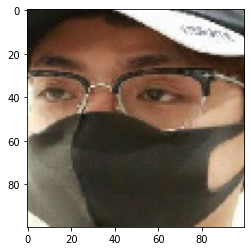

In [10]:
for category in categories:
  path = os.path.join(train_dir, category)
  class_num = categories.index(category)

  for img in os.listdir(path):
    new_image = load_img(os.path.join(path, img), target_size= (100,100))
    new_array = img_to_array(new_image)
    plt.imshow(array_to_img(new_array))
    plt.show()
    break
  break

Multiple Image Categorisation 

In [11]:
train_data = []
test_data = []
valid_data = []

def create_training_data(directory, categories, data):
  for category in categories:
    path = os.path.join(directory, category)
    class_num = categories.index(category)

    for img in os.listdir(path):
      try:
        new_image = load_img(os.path.join(path, img), target_size = (100, 100))
        new_array = img_to_array(new_image)
        data.append([new_array, class_num])
      except Exception as e:
        pass

In [12]:
create_training_data(directory = train_dir, categories = categories, data = train_data)
create_training_data(directory = test_dir, categories = categories, data = test_data)
create_training_data(directory = valid_dir, categories = categories, data = valid_data)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [13]:
print(len(train_data))
print(len(test_data))
print(len(valid_data))

2200
800
800


In [14]:
random.shuffle([train_data, test_data, valid_data])

Train Test Split Processing 

In [15]:
X_train = []
y_train = []
X_test = []
y_test = []
X_valid = []
y_valid = []

In [16]:
def get_features_and_labels(data, features, labels):
  for feature, label in data:
    features.append(feature)
    labels.append(label)
  return features, labels

In [17]:
X_train, y_train = get_features_and_labels(train_data, X_train, y_train)
X_test, y_test = get_features_and_labels(test_data, X_test, y_test)
X_valid, y_valid = get_features_and_labels(valid_data, X_valid, y_valid)

In [18]:
print(len(X_train), len(y_train),
      len(X_test), len(y_test),
      len(X_valid), len(y_valid))

2200 2200 800 800 800 800


In [19]:
print(type(X_train), type(y_train),
      type(X_test), type(y_test),
      type(X_valid), type(y_valid))

<class 'list'> <class 'list'> <class 'list'> <class 'list'> <class 'list'> <class 'list'>


#####This code is the change it the list to np array

In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid = np.array(X_valid)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)

In [21]:
print(type(X_train), type(y_train),
      type(X_test), type(y_test),
      type(X_valid), type(y_valid))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


######This code is just a visualization of a sample 

Text(0.5, 1.0, 'with_mask')

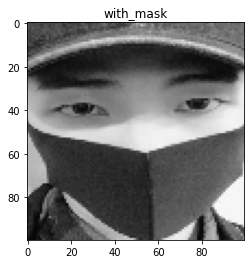

In [22]:
plt.imshow(array_to_img(X_train[344]))
plt.title(categories[y_train[344]])

###Rescaling the data for the model

In [23]:
def rescale(data):
  data = data/data.max()

  return data

In [24]:
X_train = rescale(X_train)
X_test = rescale(X_test)
X_valid = rescale(X_valid)

In [25]:
X_train.shape

(2200, 100, 100, 3)

#Model Building

In [34]:
model = Sequential()

model.add(Conv2D(filters= 100, kernel_size= [3,3], activation= 'relu', input_shape = (100, 100, 3), padding ='same'))
model.add(MaxPool2D(pool_size= (2,2), strides= (2,2)))


model.add(Conv2D(filters= 64, kernel_size= [3,3], activation= 'relu', input_shape = (100, 100, 3), padding ='same'))
model.add(MaxPool2D(pool_size= (2,2), strides= (2,2)))

model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation= 'sigmoid'))

model.compile(optimizer= opt, loss='binary_crossentropy', metrics=['accuracy']) 

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 100)     2800      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 100)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 64)        57664     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2000050   
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)               

In [27]:
from tensorflow.keras.optimizers import Adam

In [28]:
opt = Adam(lr=1e-3, decay=1e-5)

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min",
                           patience=2 )

checkpoint = ModelCheckpoint(filepath="weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                             monitor='val_loss', mode = "min", save_best_only=True)

In [35]:
model.fit(X_train, y_train, epochs = 20, batch_size= 5, validation_data= (X_valid,  y_valid), callbacks= [early_stop, checkpoint])

Epoch 1/20
440/440 [==============================] - 10s 6ms/step - loss: 0.4961 - accuracy: 0.7710 - val_loss: 0.2664 - val_accuracy: 0.9062
Epoch 2/20
440/440 [==============================] - 2s 5ms/step - loss: 0.2157 - accuracy: 0.9237 - val_loss: 0.2814 - val_accuracy: 0.9025
Epoch 3/20
440/440 [==============================] - 2s 5ms/step - loss: 0.2006 - accuracy: 0.9276 - val_loss: 0.1731 - val_accuracy: 0.9400
Epoch 4/20
440/440 [==============================] - 2s 5ms/step - loss: 0.1409 - accuracy: 0.9505 - val_loss: 0.1575 - val_accuracy: 0.9425
Epoch 5/20
440/440 [==============================] - 2s 5ms/step - loss: 0.0918 - accuracy: 0.9676 - val_loss: 0.2802 - val_accuracy: 0.9275
Epoch 6/20
440/440 [==============================] - 2s 5ms/step - loss: 0.0809 - accuracy: 0.9689 - val_loss: 0.2012 - val_accuracy: 0.9475


In [39]:
model.save('mask_on.h5')

In [40]:
loss = pd.DataFrame(model.history.history)

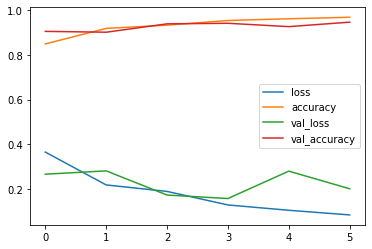

In [41]:
loss.plot()

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
predictions = model.predict_classes(X_valid)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [44]:
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       400
           1       0.94      0.96      0.95       400

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



In [45]:
pred = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       400
           1       0.95      0.97      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



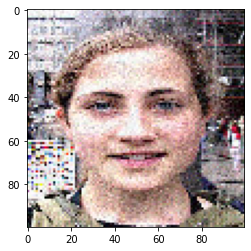

In [74]:
sample = X_test[799]

plt.imshow(array_to_img(sample))

In [75]:
pred = model.predict_classes(np.expand_dims(sample, axis=0))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [76]:
for i in pred:
  for j in i:
    print(categories[j])

without_mask
